Setup And Data loading

Descriptive Statistics:
            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  
count                    156.000000  
mean                       0.392571  
std                        0.143289  
min                        0.000000  
25%                        0.308000  
50%                        0.417000  
75%    

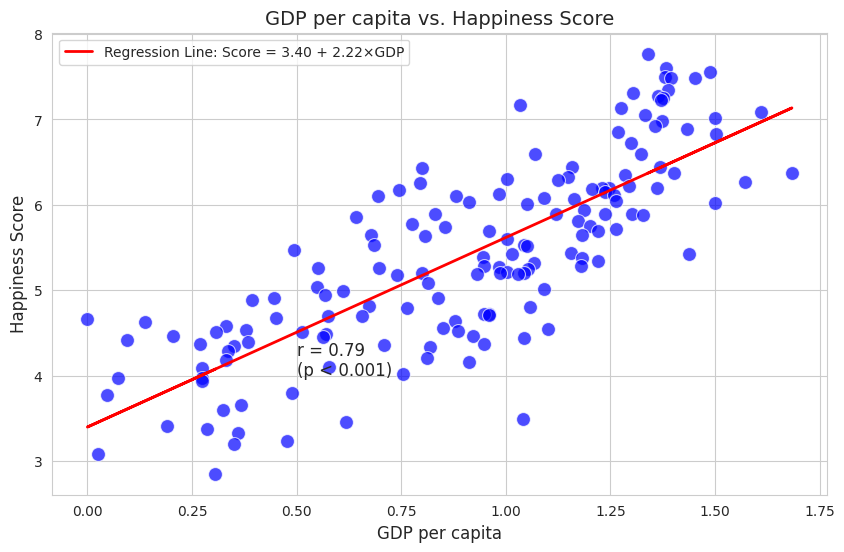

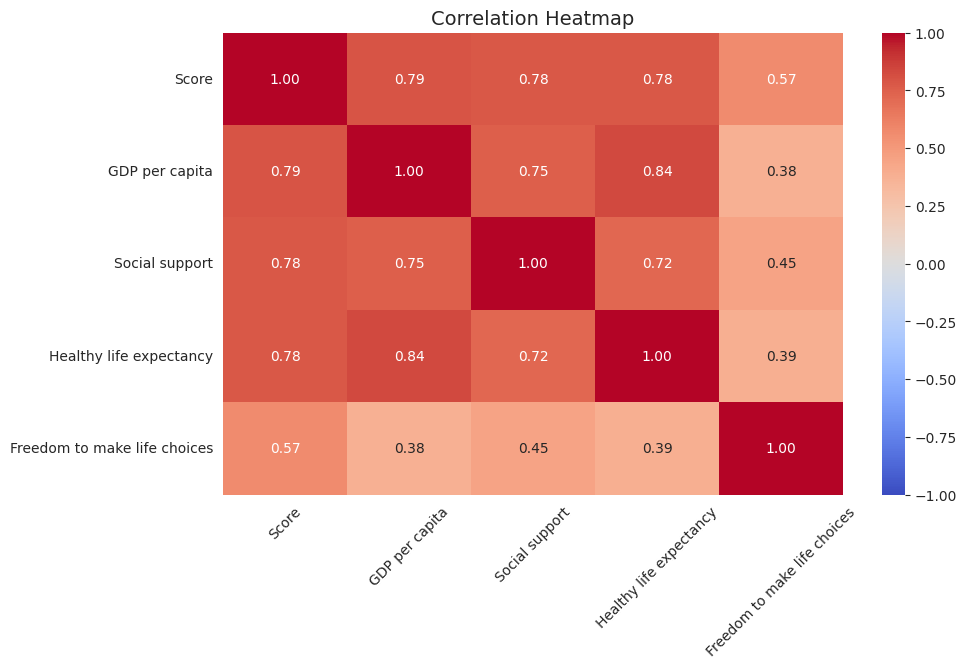


Linear Regression Results:
Equation: Happiness Score = 3.40 + 2.22×GDP
R-squared: 0.6303

Pearson Correlation Results:
Correlation coefficient (r): 0.7939
P-value: 0.0000000000 (significant)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("2019.csv")

# =========================================================================
# 1. DESCRIPTIVE STATISTICS
# =========================================================================
desc_stats = df[['Score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices']].describe()

print("Descriptive Statistics:")
print(desc_stats)

# =========================================================================
# 2. SCATTER PLOT (GDP vs. HAPPINESS) WITH REGRESSION LINE
# =========================================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='GDP per capita',
    y='Score',
    data=df,
    color='blue',
    alpha=0.7,
    s=100
)

# Add regression line
X = df[['GDP per capita']]
y = df['Score']
model = LinearRegression().fit(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2,
         label=f'Regression Line: Score = {model.intercept_:.2f} + {model.coef_[0]:.2f}×GDP')

# Annotate Pearson correlation
corr, p_value = pearsonr(df['GDP per capita'], df['Score'])
plt.text(0.5, 4.0,  # Adjust position based on your data range
         f'r = {corr:.2f}\n(p < 0.001)' if p_value < 0.001 else f'p = {p_value:.3f}',
         fontsize=12)

plt.title('GDP per capita vs. Happiness Score', fontsize=14)
plt.xlabel('GDP per capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================================================================
# 3. CORRELATION HEATMAP
# =========================================================================
corr_cols = ['Score', 'GDP per capita', 'Social support',
             'Healthy life expectancy', 'Freedom to make life choices']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    annot_kws={"size": 10}
)
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================================================================
# 4. LINEAR REGRESSION RESULTS
# =========================================================================
print("\nLinear Regression Results:")
print(f"Equation: Happiness Score = {model.intercept_:.2f} + {model.coef_[0]:.2f}×GDP")
print(f"R-squared: {model.score(X, y):.4f}")

# =========================================================================
# 5. PEARSON'S R CALCULATION
# =========================================================================
print("\nPearson Correlation Results:")
print(f"Correlation coefficient (r): {corr:.4f}")
print(f"P-value: {p_value:.10f} {'(significant)' if p_value < 0.05 else '(not significant)'}")

# =========================================================================
# BONUS: SAVE STATS TO CSV
# =========================================================================
desc_stats.to_csv('descriptive_stats.csv')
corr_matrix.to_csv('correlation_matrix.csv')